In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import pdist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

warnings.filterwarnings('ignore')

In [2]:
cancer_data = pd.read_csv('../b. Datasets/Breast Cancer/Breast Cancer Dataset.csv')
cancer_data_unchanged = pd.read_csv('../b. Datasets/Breast Cancer/Breast Cancer Dataset.csv')

In [3]:
display(cancer_data.head(2))
display(cancer_data.tail(2))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


In [4]:
cancer_data.shape

(569, 32)

In [5]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
cancer_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
cancer_data.select_dtypes(include='number').std()

id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


In [9]:
cancer_data.drop(labels=['id', 'diagnosis'], axis=1, inplace=True)

In [10]:
cancer_data.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
cancer_data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

We can use tree based algorithms and hence outlier treatment is not needed.

In [12]:
correlation_matrix = cancer_data.corr()
correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

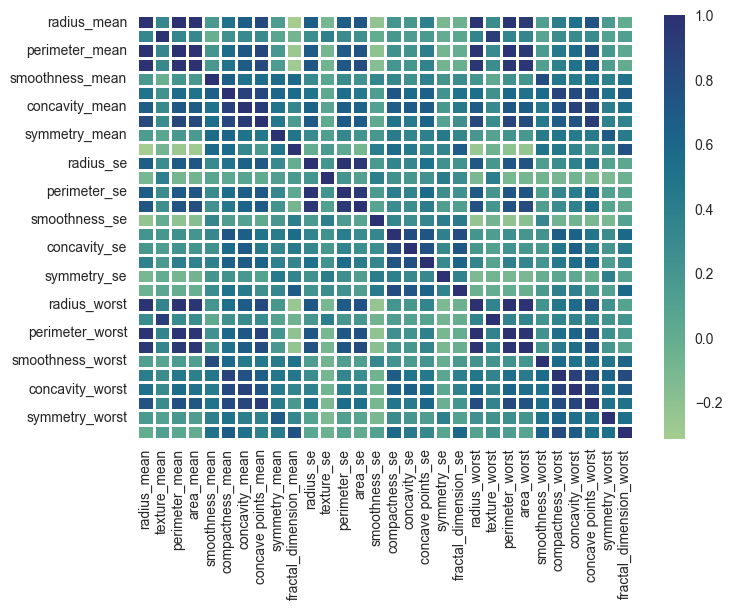

In [13]:
sns.heatmap(correlation_matrix, cmap='crest', linewidths=0.8)

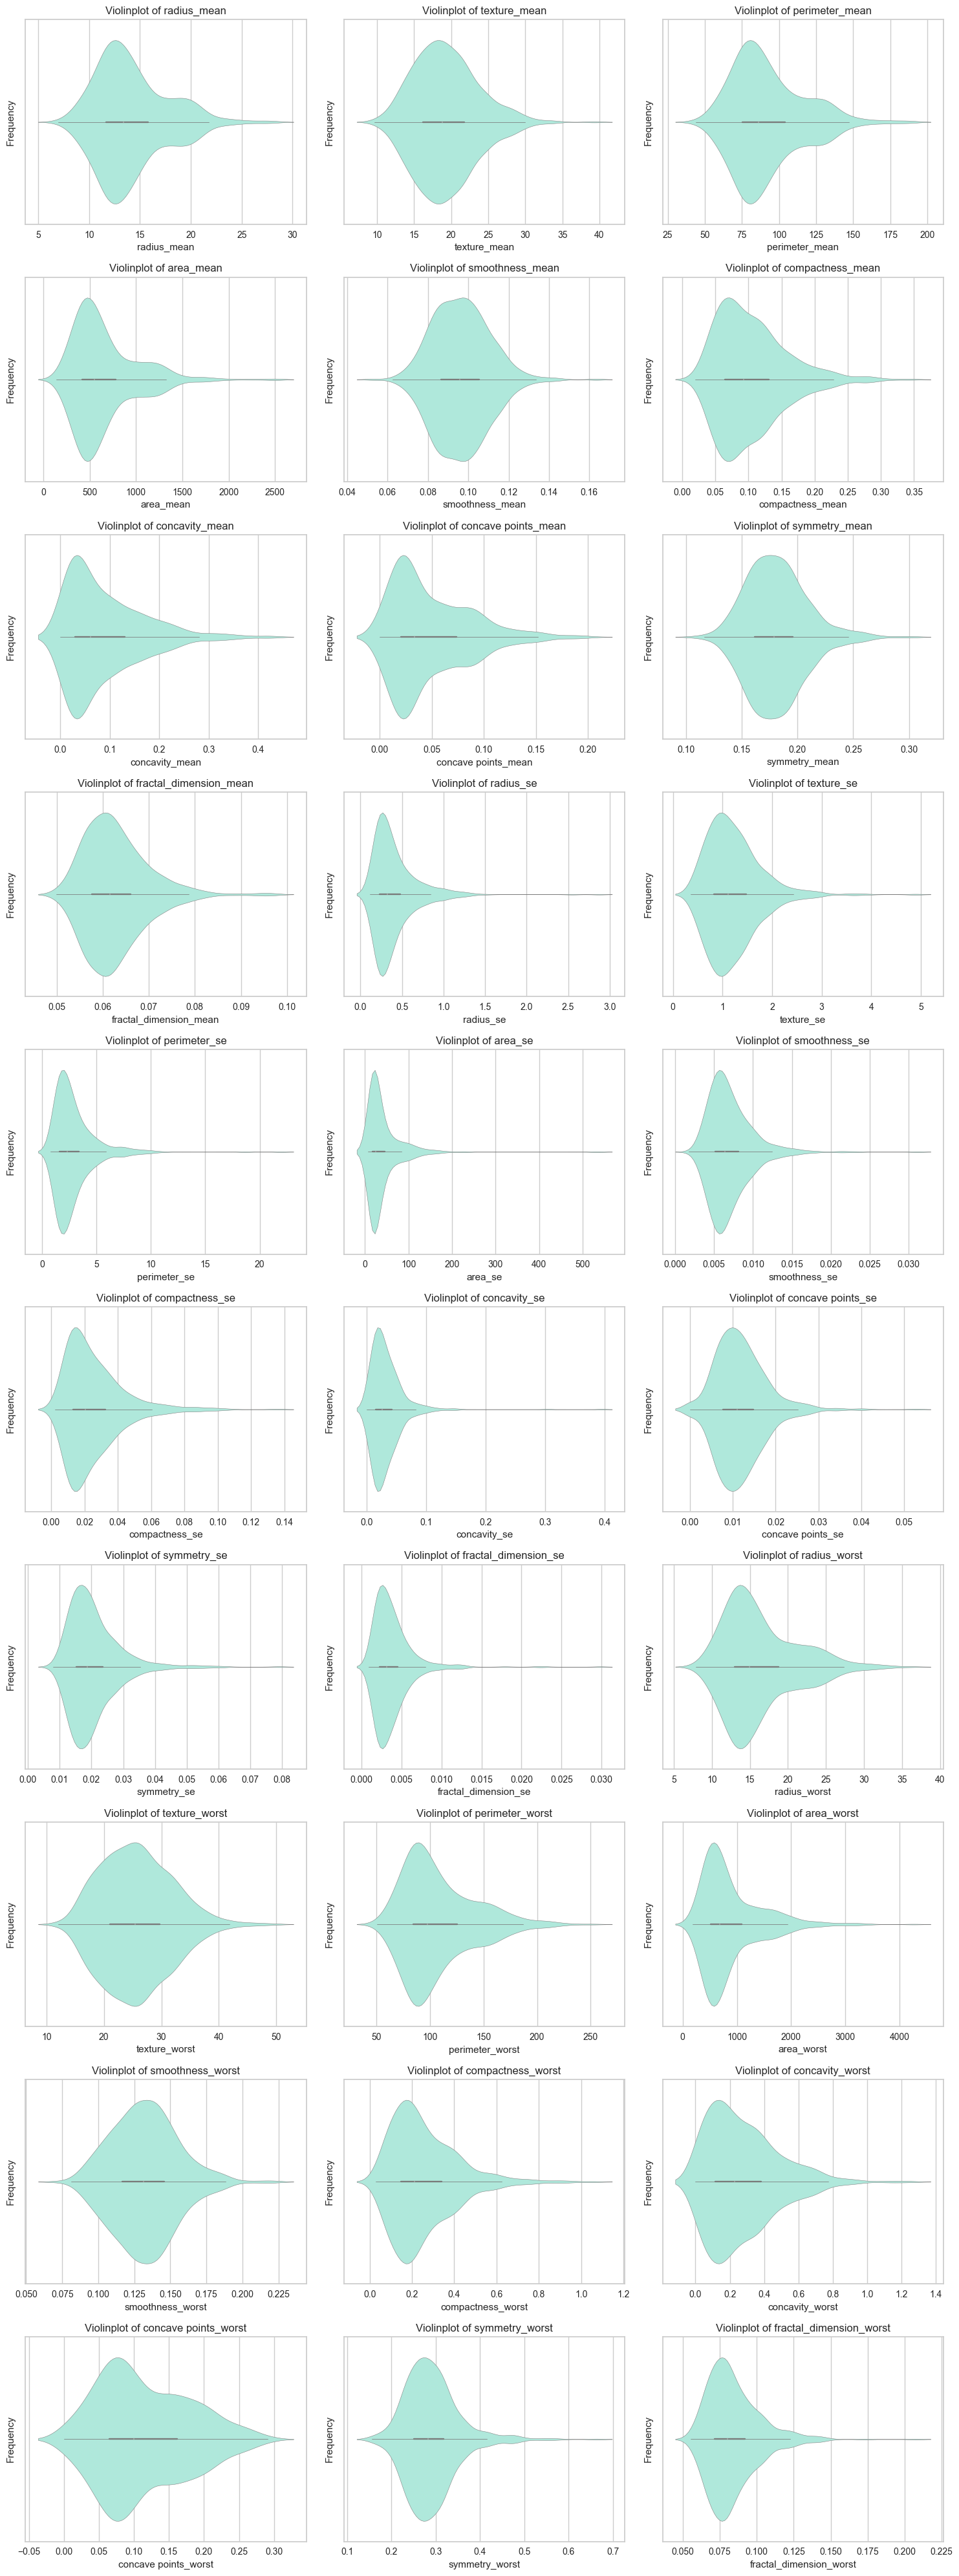

In [14]:
num_columns = cancer_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.violinplot(data=cancer_data, x=column, ax=axes[i], color='#A6F1E0')
    axes[i].set_title(f'Violinplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [15]:
standard_scaler = StandardScaler()
cancer_data_features = cancer_data.columns
cancer_data_scaled = pd.DataFrame(data=standard_scaler.fit_transform(cancer_data), 
                                  columns=cancer_data_features)

In [16]:
cancer_data_scaled.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [17]:
cancer_data_scaled.shape

(569, 30)

In [18]:
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(cancer_data_scaled)

In [19]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.9) + 1

In [20]:
print("The number of components needed to capture 90% of the variance in data is", num_components)

The number of components needed to capture 90% of the variance in data is 7


In [21]:
print("Explained variance is", cumulative_variance[:7])

Explained variance is [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953 ]


In [22]:
print("The top 5 eigen values are:", pca.explained_variance_[:5])
print("Top 5 eigen vectors are:\n", pca.components_[:5])

The top 5 eigen values are: [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324]
Top 5 eigen vectors are:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
   0.00273384 -0.02556354 -0.04023994 -0.02257409  0.26848139  0.3746

In [23]:
pca_data_pcs = pd.DataFrame(data=pca_data, 
                            columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [24]:
pca_data_pcs.shape

(569, 7)

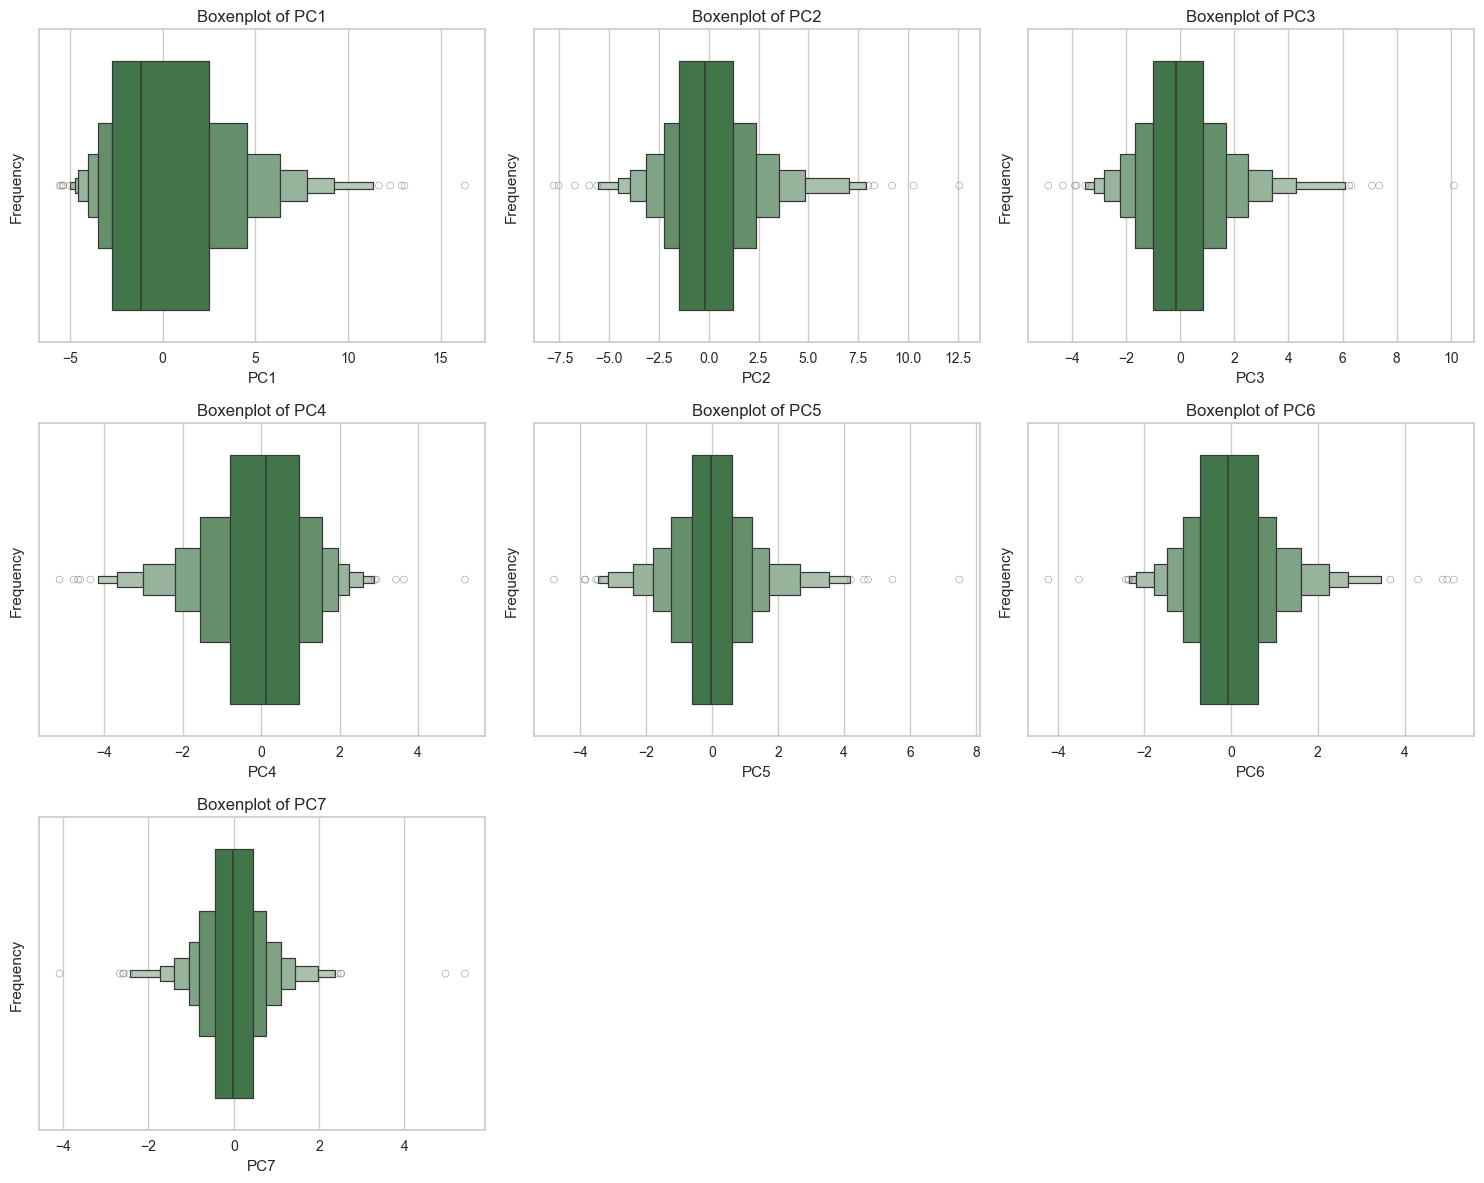

In [25]:
num_columns = pca_data_pcs.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.boxenplot(data=pca_data_pcs, x=column,ax=axes[i], color='#3A7D44')
    axes[i].set_title(f'Boxenplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [26]:
cluster_start = 2
cluster_end = 15
cluster_range = range(cluster_start, cluster_end)
inertia = []

for k in cluster_range:
    k_means_model = KMeans(n_clusters=k, 
                           init='k-means++', 
                           n_init=30, 
                           max_iter=300)
    k_means_model.fit(pca_data_pcs)
    inertia.append(k_means_model.inertia_)
print("Within cluster sum of squares = Inertia is", inertia)

Within cluster sum of squares = Inertia is [10062.43800564185, 8534.851555471414, 7741.16939534612, 7039.940631400331, 6476.327659537869, 6051.268588857606, 5747.495950973043, 5391.363144117714, 5157.209814708309, 4971.649434315619, 4803.769879110001, 4645.052344777435, 4517.005533793194]


#### Knee Locator - Elbow method

In [27]:
kneedle = KneeLocator(cluster_range, 
                      inertia, 
                      curve='convex', 
                      direction='decreasing')
optimum_clusters = kneedle.elbow
print("The optimum number of clusters by the Knee Locator (Elbow method) is", optimum_clusters)

The optimum number of clusters by the Knee Locator (Elbow method) is 6


#### Elbow plot

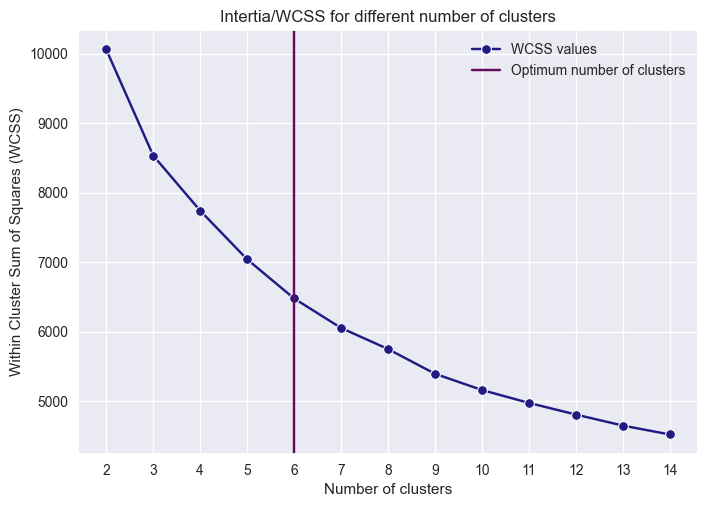

In [28]:
sns.set_style('darkgrid')
sns.lineplot(y=inertia, x=cluster_range, marker='o', color='#211C84', label="WCSS values")
plt.xticks(cluster_range)
plt.axvline(x=optimum_clusters, color='#640D5F', label='Optimum number of clusters')
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Intertia/WCSS for different number of clusters")
plt.legend()
plt.show()

#### Silhouette Score

In [29]:
cluster_range = range(2, 15)
silhouette_scores_kmeans = []

for k in cluster_range:
    k_means_model = KMeans(n_clusters=k, 
                           init='k-means++', 
                           max_iter=300, 
                           n_init=20)
    k_means_model.fit(pca_data_pcs)
    cluster_labels = k_means_model.predict(pca_data_pcs)
    silhouette_scores_kmeans.append(silhouette_score(pca_data_pcs, cluster_labels))
    
print("Silhouette scores are", silhouette_scores_kmeans)

Silhouette scores are [0.3710340085320741, 0.33759584882328497, 0.30854369835359263, 0.18625755995058374, 0.18954210937628263, 0.1829847092777514, 0.17434718563961998, 0.17772745453082167, 0.16811214989457612, 0.14504036431083864, 0.15405130687273913, 0.15020688158732692, 0.15173275772079958]


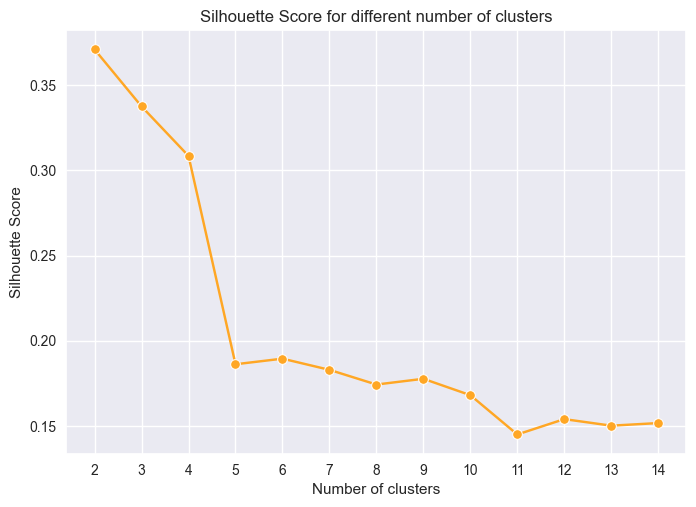

In [30]:
sns.set_style('darkgrid')
sns.lineplot(y=silhouette_scores_kmeans, x=cluster_range, marker='o', color='#FFA725')
plt.xticks(cluster_range)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different number of clusters")
plt.show()

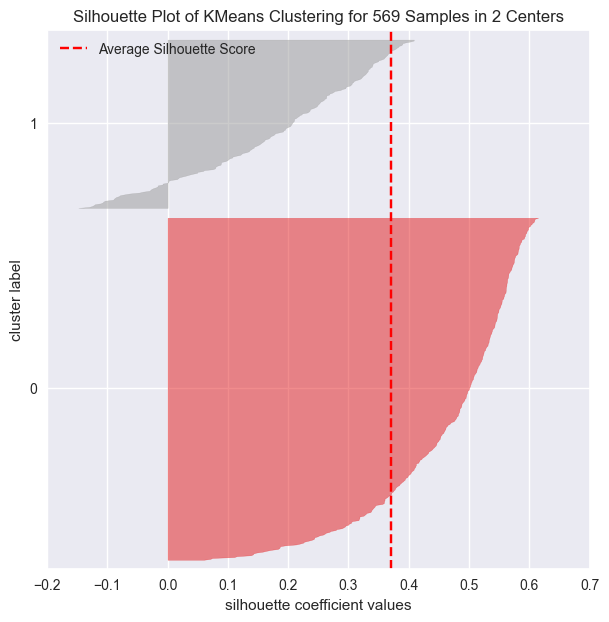

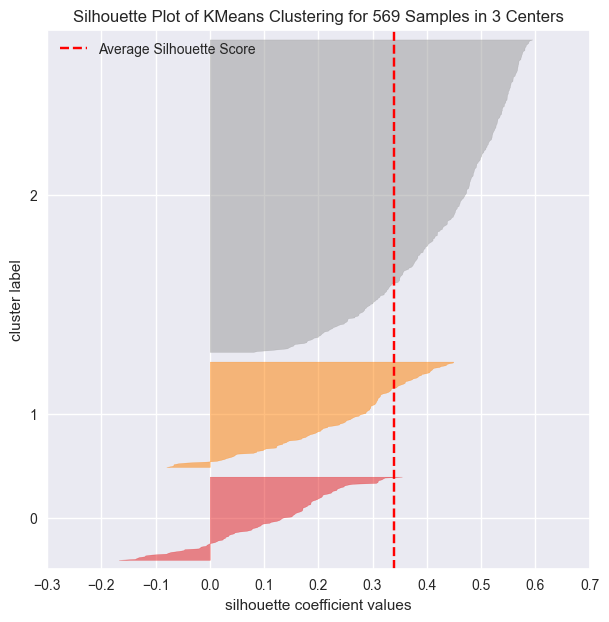

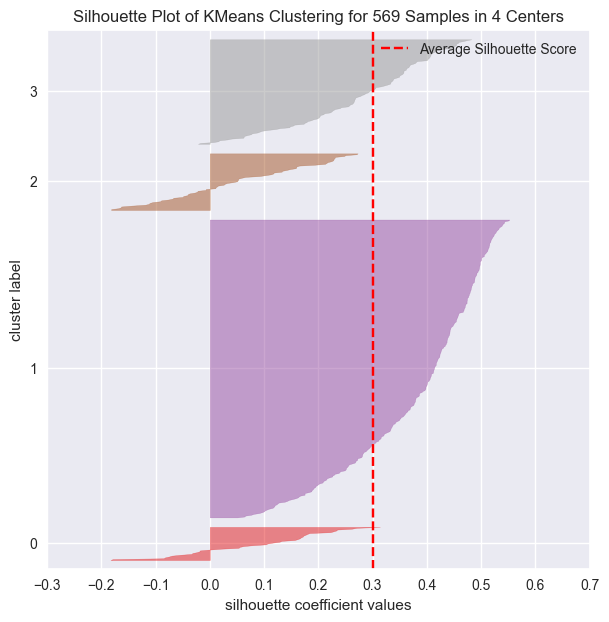

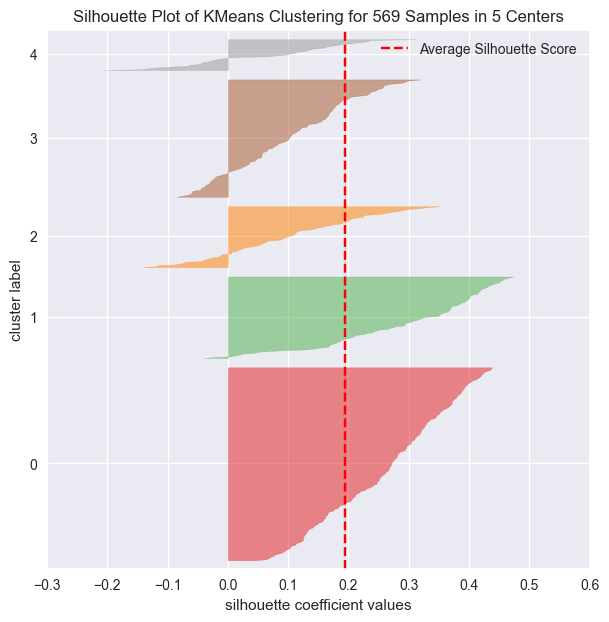

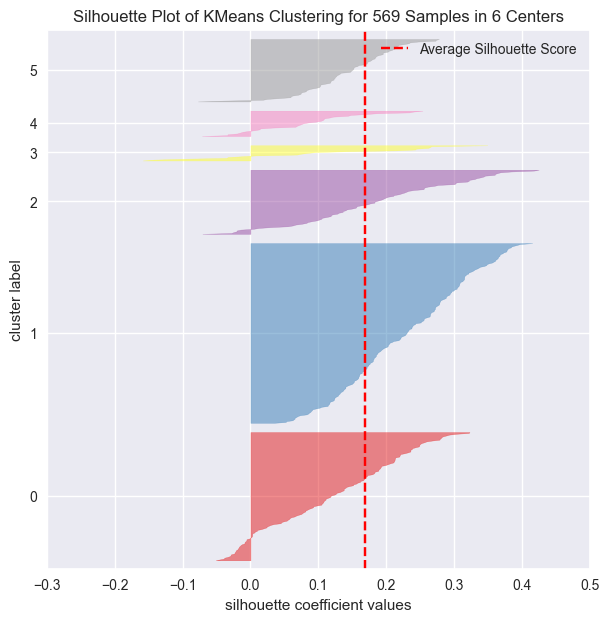

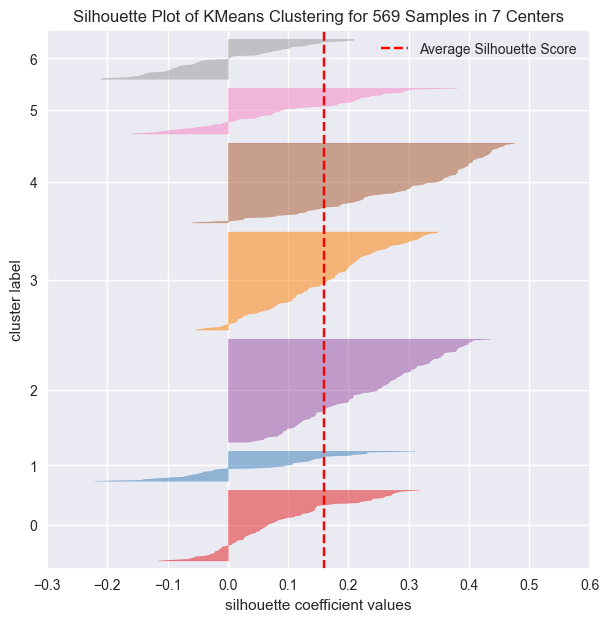

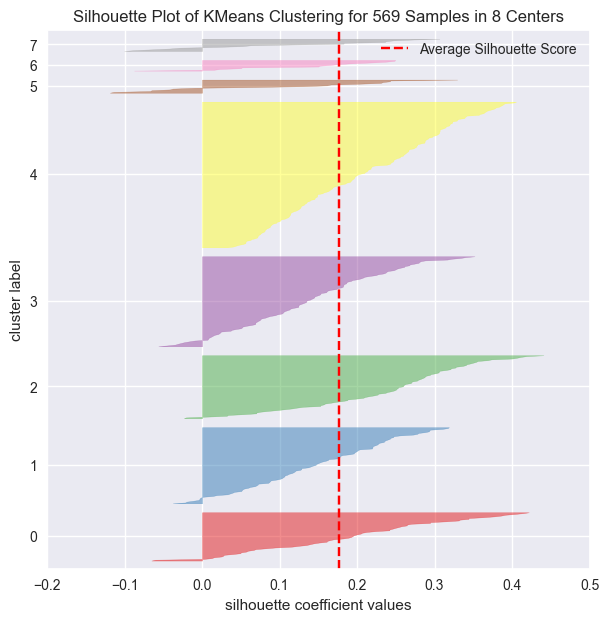

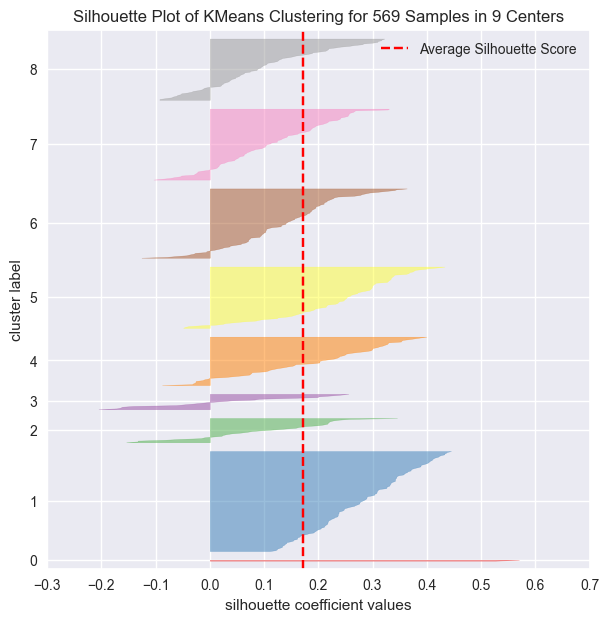

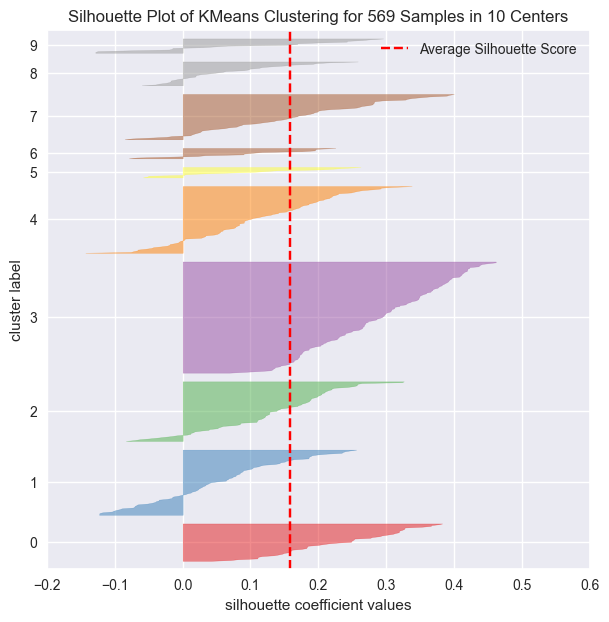

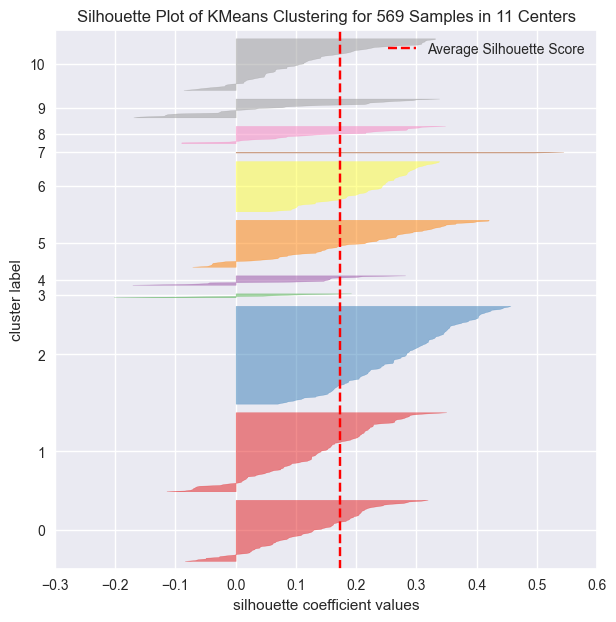

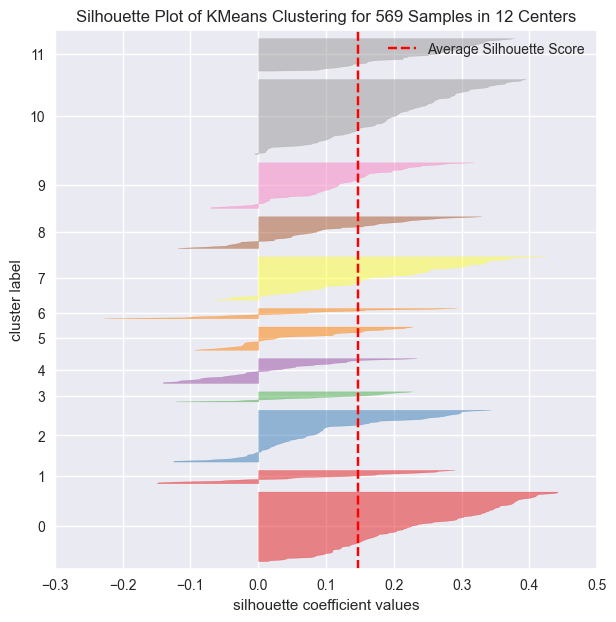

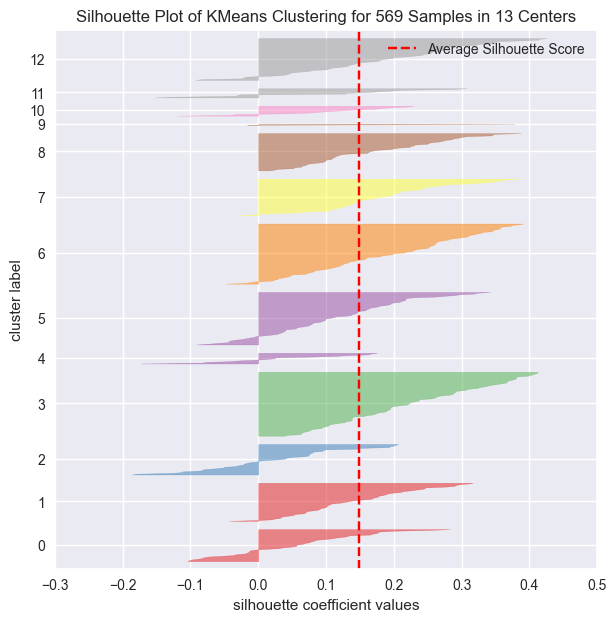

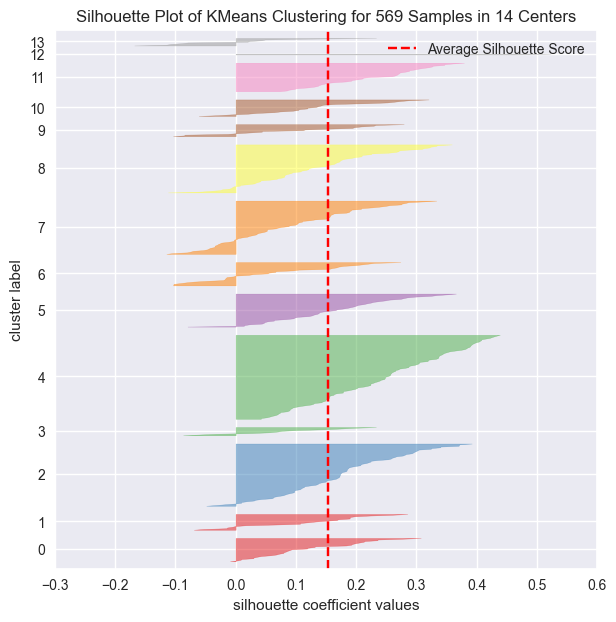

In [31]:
for k in cluster_range:
    plt.figure(figsize=(7, 7))
    model = SilhouetteVisualizer(estimator=KMeans(k))
    model.fit(pca_data_pcs)
    model.show()

In [32]:
optimum_clusters = 2

In [33]:
k_means_model = KMeans(n_clusters=optimum_clusters)

cluster_labels = k_means_model.fit_predict(pca_data_pcs)
pca_data_with_clusters = pca_data_pcs.copy(deep=True)
pca_data_with_clusters["Cluster"] = cluster_labels

In [34]:
print("Silhouette score with K-Means clustering")
silhouette_score(pca_data_with_clusters, pca_data_with_clusters["Cluster"])

Silhouette score with K-Means clustering


0.37607899891359103

In [35]:
pca_data_with_clusters.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,1


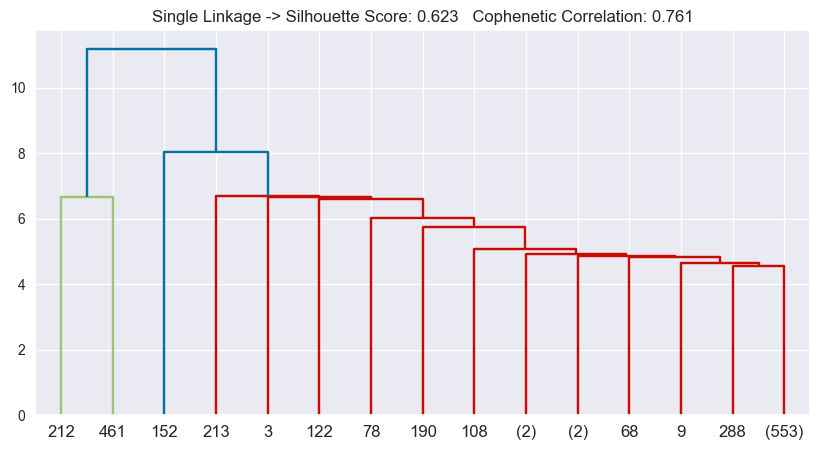

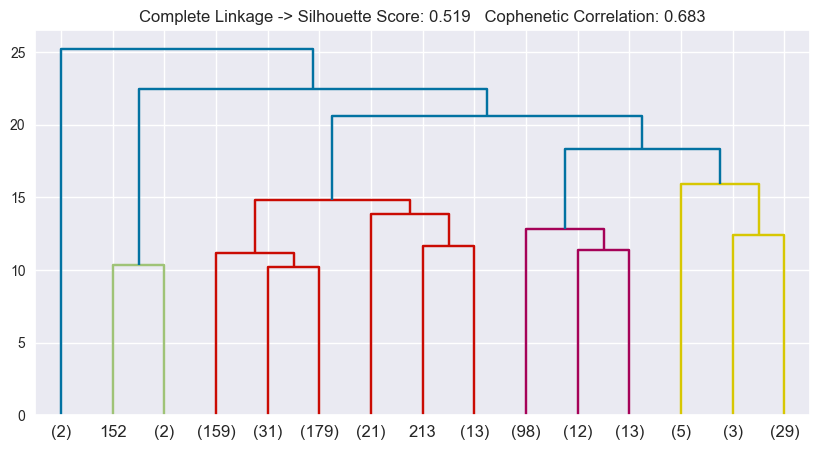

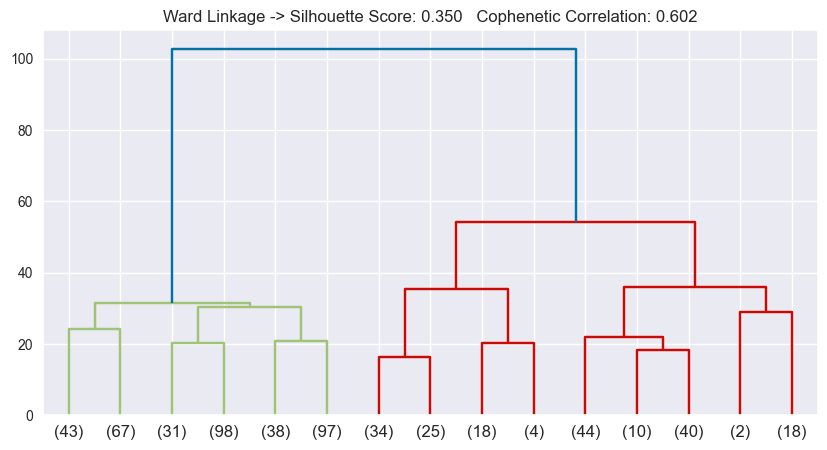

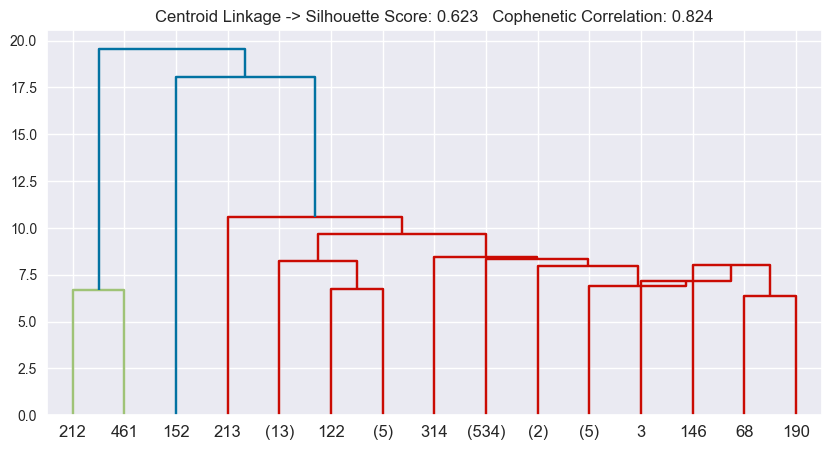

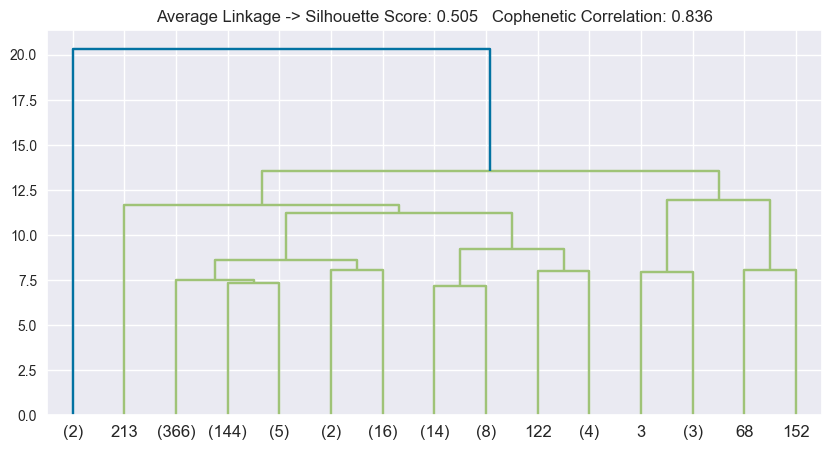

In [ ]:
cophenetic_correlation_strs = []
silhouette_scores_strs = []
for linkage_method in ['single', 'complete', 'ward', 'centroid', 'average']:
    plt.figure(figsize=(10, 5))
    linkage_matrix = linkage(pca_data_with_clusters, 
                             method=linkage_method, 
                             metric='euclidean')
    dendrogram(linkage_matrix, p=15, truncate_mode='lastp')
    coph_corr, _ = cophenet(linkage_matrix, pdist(pca_data_with_clusters))
    cluster_labels = fcluster(linkage_matrix, t=optimum_clusters, criterion='maxclust')
    silhouette = silhouette_score(pca_data_with_clusters, cluster_labels)
    cophenetic_correlation_strs.append(f"Cophenetic Correlation for {linkage_method}: {coph_corr:.4f}")
    silhouette_scores_strs.append(f"Silhouette Score for {linkage_method}: {silhouette:.4f}")
    title_string = linkage_method.title() + " Linkage -> Silhouette Score: " + str(silhouette)[:5] + "   Cophenetic Correlation: " + str(coph_corr)[:5]
    plt.title(title_string)
    plt.show()

In [37]:
cophenetic_correlation_strs

['Cophenetic Correlation for single: 0.7614',
 'Cophenetic Correlation for complete: 0.6836',
 'Cophenetic Correlation for ward: 0.6020',
 'Cophenetic Correlation for centroid: 0.8242',
 'Cophenetic Correlation for average: 0.8362']

In [38]:
silhouette_scores_strs

['Silhouette Score for single: 0.6237',
 'Silhouette Score for complete: 0.5199',
 'Silhouette Score for ward: 0.3505',
 'Silhouette Score for centroid: 0.6237',
 'Silhouette Score for average: 0.5056']

In [39]:
agg_model = AgglomerativeClustering(n_clusters=optimum_clusters, linkage='single')
pca_data_agg_cl = pca_data_pcs.copy(deep=True)
pca_data_agg_cl["Cluster"] = agg_model.fit_predict(pca_data_pcs)

In [40]:
pca_data_agg_cl.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0


In [41]:
print("Agglomerative")
silhouette_score(pca_data_agg_cl, pca_data_agg_cl["Cluster"])

Agglomerative


0.666957339406533

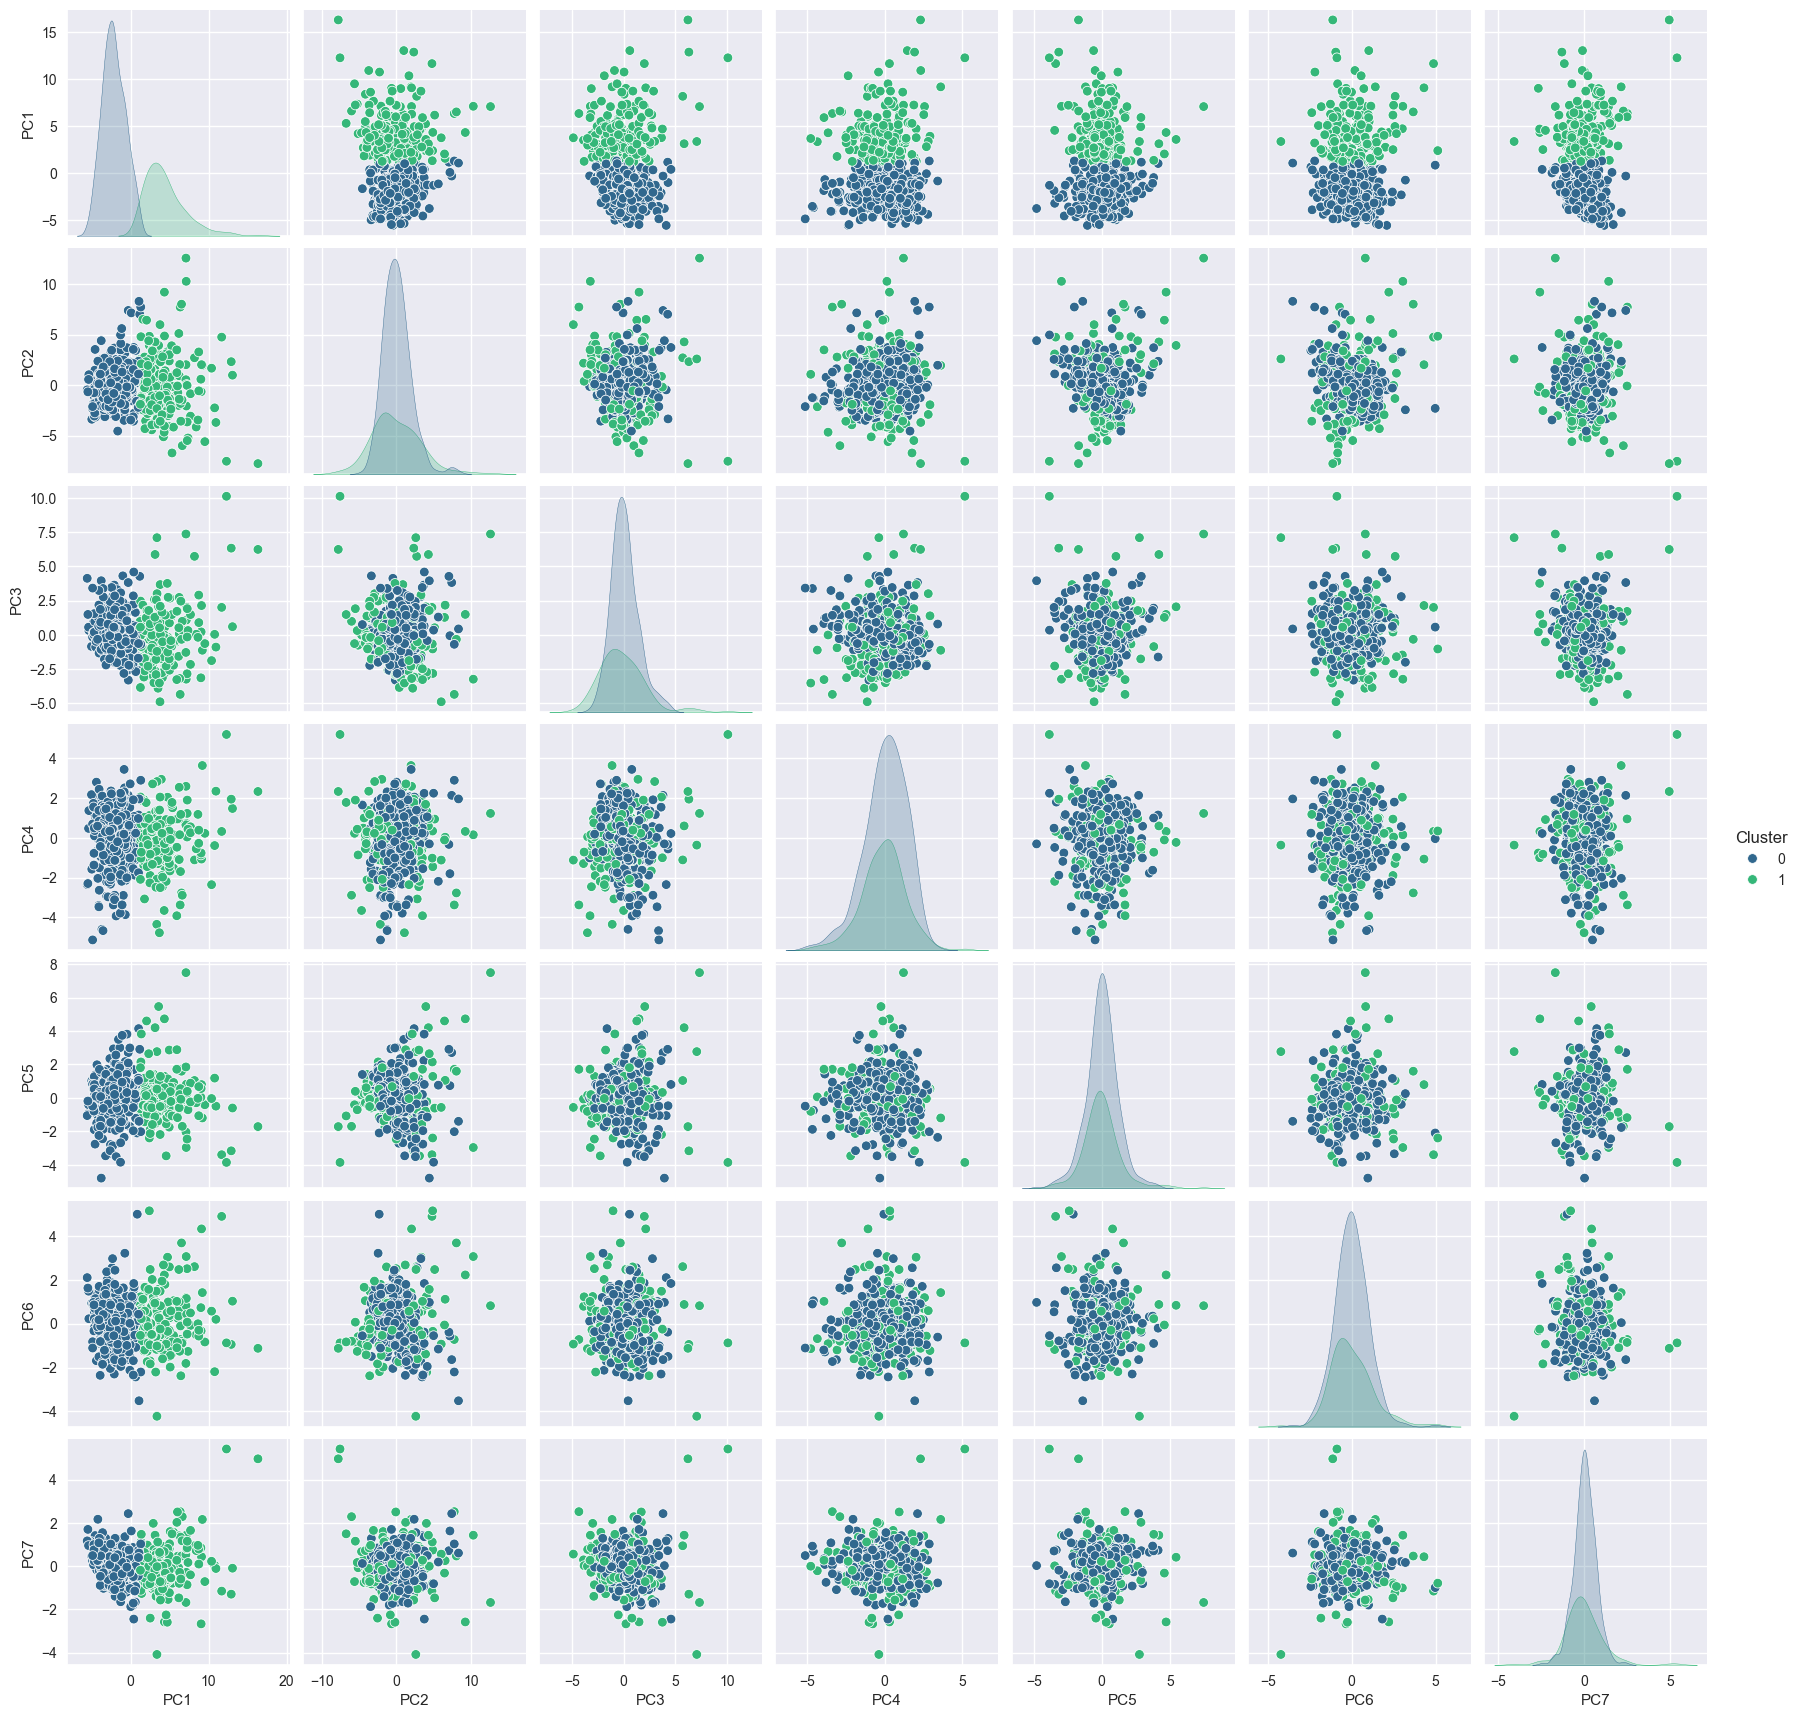

In [42]:
sns.pairplot(pca_data_with_clusters, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

In [43]:
submission_df = pd.DataFrame({
    'Index': pca_data_with_clusters.index,
    'Cluster': pca_data_with_clusters['Cluster']
}).sort_values(by='Index', ascending=False)
display(submission_df.head(2))
display(submission_df.tail(2))

,Index,Cluster
568,568,0
567,567,1


,Index,Cluster
1,1,1
0,0,1


In [44]:
submission_df.to_csv("../d. Output Files/Breast Cancer/Breast Cancer Clustering.csv", index=False)